In [1]:
# %load /Users/Jonathan/.je.py
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
plt.rcParams['figure.figsize'] = 12,6

import json
import re

In [2]:
df = pd.read_csv('data/train.csv')

In [3]:
df_test = pd.read_csv('data/test.csv')

In [4]:
df.shape

(3000, 23)

In [5]:
df.columns

Index(['id', 'belongs_to_collection', 'budget', 'genres', 'homepage',
       'imdb_id', 'original_language', 'original_title', 'overview',
       'popularity', 'poster_path', 'production_companies',
       'production_countries', 'release_date', 'runtime', 'spoken_languages',
       'status', 'tagline', 'title', 'Keywords', 'cast', 'crew', 'revenue'],
      dtype='object')

In [6]:
df.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [7]:
# import altair as alt
# from vega_datasets import data
# alt.renderers.enable('notebook')

# source = data.cars()

# iris = data.iris()

# alt.Chart(iris).mark_point().encode(
#     x='petalLength',
#     y='petalWidth',
#     color='species'
# )

In [8]:
df.corr()

,id,budget,popularity,runtime,revenue
id,1.000000,0.019732,-0.007470,0.010750,0.000610
budget,0.019732,1.000000,0.342356,0.238373,0.752965
popularity,-0.007470,0.342356,1.000000,0.133690,0.461460
runtime,0.010750,0.238373,0.133690,1.000000,0.216380
revenue,0.000610,0.752965,0.461460,0.216380,1.000000


#### original_language

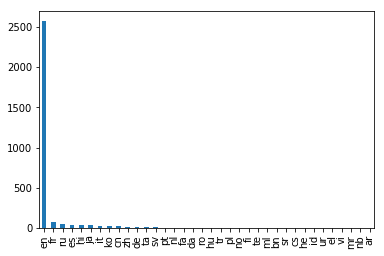

In [9]:
df['original_language'].value_counts().plot(kind='bar')

#### Belongs_to_collection

In [10]:
df['belongs_to_collection'].apply(lambda x: pd.isna(x)).value_counts()
# Convert 'belongs_to_collection' to binary value: is or is not serial movie
df['belongs_to_collection'].fillna(0,inplace=True)
# df['belongs_to_collection'] = df['belongs_to_collection'].apply(lambda x:0 if x==0 else 1)

In [11]:
df['belongs_to_collection'].apply(lambda x:0 if x==0 else 1).value_counts()

0    2396
1     604
Name: belongs_to_collection, dtype: int64

2396 values are empty (do not belong to collections)

In [12]:
df['belongs_to_collection'][0]

"[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}]"

In [13]:
# extract the name from the line, return Nan if no line
def get_name(x):
    print(x,type(x))
    if x == 0:
        return np.nan
    else:
        x = str(x)
        x = x.replace('\'','\"')
        print(x)
        return re.findall(r'name\":\s\"(.*?)\"',x)[0]
        #return json.loads(x)[0]['name']

#    print('-->')
    #return re.findall('name\':\s\'(.*?)\',',str(x))[0]
    #return "error"

In [14]:
df['collection_name'] = df['belongs_to_collection'].apply(lambda x: get_name(x))

[{'id': 313576, 'name': 'Hot Tub Time Machine Collection', 'poster_path': '/iEhb00TGPucF0b4joM1ieyY026U.jpg', 'backdrop_path': '/noeTVcgpBiD48fDjFVic1Vz7ope.jpg'}] <class 'str'>
[{"id": 313576, "name": "Hot Tub Time Machine Collection", "poster_path": "/iEhb00TGPucF0b4joM1ieyY026U.jpg", "backdrop_path": "/noeTVcgpBiD48fDjFVic1Vz7ope.jpg"}]
[{'id': 107674, 'name': 'The Princess Diaries Collection', 'poster_path': '/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg', 'backdrop_path': '/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg'}] <class 'str'>
[{"id": 107674, "name": "The Princess Diaries Collection", "poster_path": "/wt5AMbxPTS4Kfjx7Fgm149qPfZl.jpg", "backdrop_path": "/zSEtYD77pKRJlUPx34BJgUG9v1c.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 256377, 'name': 'The Muppet Collection', 'poster_path': '/8Ew8EIdFFurMMYjSbWPu1Hl4vLX.jpg', 'backdrop_path': '/1AWd3MM90G47mxtD112gRDxSXY9.jpg'}] <class 'str'>
[{"id": 256377, "name": "The Muppet Collection", "po

[{"id": 119, "name": "The Lord of the Rings Collection", "poster_path": "/p4UokEk2XnjjRTdXGe6DLYXlbI1.jpg", "backdrop_path": "/bccR2CGTWVVSZAG0yqmy3DIvhTX.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 426103, 'name': 'Ouija Collection', 'poster_path': '/Hn8bic15hWcTVJnZkf6WGu5Mm7.jpg', 'backdrop_path': '/m5nPr3cOxqzU68luWfwNngazHnE.jpg'}] <class 'str'>
[{"id": 426103, "name": "Ouija Collection", "poster_path": "/Hn8bic15hWcTVJnZkf6WGu5Mm7.jpg", "backdrop_path": "/m5nPr3cOxqzU68luWfwNngazHnE.jpg"}]
[{'id': 95051, 'name': 'The Up Series', 'poster_path': '/nLIBjyGeV2TMiv82MmKq5zX9DhG.jpg', 'backdrop_path': None}] <class 'str'>
[{"id": 95051, "name": "The Up Series", "poster_path": "/nLIBjyGeV2TMiv82MmKq5zX9DhG.jpg", "backdrop_path": None}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 405393, 'name': 'The Black Stallion Collection', 'poster_path': '/1B

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 937, 'name': 'The Pink Panther (Original) Collection', 'poster_path': '/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg', 'backdrop_path': '/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg'}] <class 'str'>
[{"id": 937, "name": "The Pink Panther (Original) Collection", "poster_path": "/xu6gZ0zGUSR8SC2QLKFaUrX2niM.jpg", "backdrop_path": "/6KE7AguGR3UqwUn5RkzkoBc3MLy.jpg"}]
[{'id': 201576, 'name': 'The Cabin Fever Collection', 'poster_path': '/u4SLX7S1SdBzaUzPpGWfRaEa1E1.jpg', 'backdrop_path': '/j82lEJUxFlXC35Pi75P3sAbkTUq.jpg'}] <class 'str'>
[{"id": 201576, "name": "The Cabin Fever Collection", "poster_path": "/u4SLX7S1SdBzaUzPpGWfRaEa1E1.jpg", "backdrop_path": "/j82lEJUxFlXC35Pi75P3sAbkTUq.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 387219, 'name': 'The Hustler Collection', 'poster_path': '/8kBQvshMpK76aET1hLfAxnDle5W.jpg', 'backdrop_path': None}] <class 'str'>
[{"id": 387219, "name": "The Hustler Collection", "poster_path": "/8kBQvshMpK76aET1

0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 158391, 'name': 'The Apu Collection', 'poster_path': '/kDZJiqL5bCWsbdw2WFqwQoYLUhj.jpg', 'backdrop_path': '/b5zCX85EvJpizJzA2WaQmkd6DN6.jpg'}] <class 'str'>
[{"id": 158391, "name": "The Apu Collection", "poster_path": "/kDZJiqL5bCWsbdw2WFqwQoYLUhj.jpg", "backdrop_path": "/b5zCX85EvJpizJzA2WaQmkd6DN6.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 9485, 'name': 'The Fast and the Furious Collection', 'poster_path': '/mCkqJf4ijbNoBWvJ0RTWZJuhJUA.jpg', 'backdrop_path': '/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg'}] <class 'str'>
[{"id": 9485, "name": "The Fast and the Furious Collection", "poster_path": "/mCkqJf4ijbNoBWvJ0RTWZJuhJUA.jpg", "backdrop_path": "/z5A5W3WYJc3UVEWljSGwdjDgQ0j.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 44976, 'na

0 <class 'int'>
[{'id': 266672, 'name': 'Ted Collection', 'poster_path': '/uHKT9b6ptLpttGHlUF95sKQbtqF.jpg', 'backdrop_path': '/dGrNuWhapf8T0WH98xTC4LXgk1G.jpg'}] <class 'str'>
[{"id": 266672, "name": "Ted Collection", "poster_path": "/uHKT9b6ptLpttGHlUF95sKQbtqF.jpg", "backdrop_path": "/dGrNuWhapf8T0WH98xTC4LXgk1G.jpg"}]
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
0 <class 'int'>
[{'id': 52783, 'name': 'Wall Street Collection', 'poster_path': '/dmGQDIrfvmr5rahYcVhpS2xx6oy.jpg', 'backdrop_path': '/sEKYBSwZFFppJ5GmEVxsECr7ilR.jpg'}] <class 'str'>
[{"id": 52783, "name": "Wall Street Collection", "poster_path": "/dmGQDIrfvmr5rahYcVhpS2xx6oy.jpg", "backdrop_path": "/sEKYBSwZFFppJ5GmEVxsECr7ilR.jpg"}]
0 <class 'int'>
0 <class 'int'>
[{'id': 1241, 'name': 'Harry Potter Collection', 'poster_path': '/8Xmkc1HvCOpMlbFvVabrtr6HAsp.jpg', 'backdrop_path': '/wfnMt6LGqYHcNyOfsuusw5lX3bL.jpg'}] <class 'str'>
[{"id": 1241, "name": "Harry Potter Collection", "poster_path": "/8Xmkc1Hv

In [15]:
df['has_collection'] = df['collection_name'].apply(lambda x: 0 if pd.isna(x) else 1)

In [16]:
df = df.drop('belongs_to_collection',axis = 1)

In [17]:
df.head()

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
0,1,14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,/tQtWuwvMf0hCc2QR2tkolwl7c3c.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651,Hot Tub Time Machine Collection,1
1,2,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,/w9Z7A0GHEhIp7etpj0vyKOeU1Wx.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435,The Princess Diaries Collection,1
2,3,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,/lIv1QinFqz4dlp5U4lQ6HaiskOZ.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000,NaN,0
3,4,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,/aTXRaPrWSinhcmCrcfJK17urp3F.jpg,...,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000,NaN,0
4,5,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,/m22s7zvkVFDU9ir56PiiqIEWFdT.jpg,...,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970,NaN,0


#### Genres

In [18]:
x = df.iloc[100]['genres']
x

"[{'id': 28, 'name': 'Action'}, {'id': 53, 'name': 'Thriller'}, {'id': 878, 'name': 'Science Fiction'}, {'id': 80, 'name': 'Crime'}, {'id': 27, 'name': 'Horror'}]"

In [19]:
def pattern(x):
    return re.findall(r'name\':\s\'(.*?)\'',x)

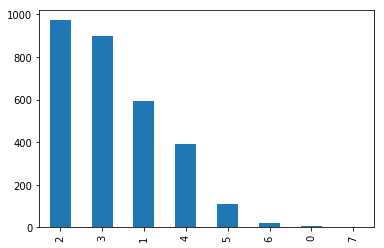

In [20]:
df['genres'].apply(lambda x: len(pattern(x)) if not pd.isna(x) else 0).value_counts().plot('bar')

In [21]:
a = []
df['genres'].apply(lambda x: a.append(pattern(x)) if not pd.isna(x) else 0)

0      NaN
1      NaN
2      NaN
3      NaN
4      NaN
5      NaN
6      NaN
7      NaN
8      NaN
9      NaN
10     NaN
11     NaN
12     NaN
13     NaN
14     NaN
15     NaN
16     NaN
17     NaN
18     NaN
19     NaN
20     NaN
21     NaN
22     NaN
23     NaN
24     NaN
25     NaN
26     NaN
27     NaN
28     NaN
29     NaN
        ..
2970   NaN
2971   NaN
2972   NaN
2973   NaN
2974   NaN
2975   NaN
2976   NaN
2977   NaN
2978   NaN
2979   NaN
2980   NaN
2981   NaN
2982   NaN
2983   NaN
2984   NaN
2985   NaN
2986   NaN
2987   NaN
2988   NaN
2989   NaN
2990   NaN
2991   NaN
2992   NaN
2993   NaN
2994   NaN
2995   NaN
2996   NaN
2997   NaN
2998   NaN
2999   NaN
Name: genres, Length: 3000, dtype: float64

In [22]:
from collections import Counter
b = []
[b.append(e) for els in a for e in els]
genres_dict = Counter(b)

In [23]:
sorted(genres_dict.items(),key=lambda x: x[1],reverse=True)
# or genres_dict.most_common() 

[('Drama', 1531),
 ('Comedy', 1028),
 ('Thriller', 789),
 ('Action', 741),
 ('Romance', 571),
 ('Crime', 469),
 ('Adventure', 439),
 ('Horror', 301),
 ('Science Fiction', 290),
 ('Family', 260),
 ('Fantasy', 232),
 ('Mystery', 225),
 ('Animation', 141),
 ('History', 132),
 ('Music', 100),
 ('War', 100),
 ('Documentary', 87),
 ('Western', 43),
 ('Foreign', 31),
 ('TV Movie', 1)]

In [24]:
df[df['genres'].apply(lambda x: pd.isna(x))]

,id,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,poster_path,...,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue,collection_name,has_collection
470,471,2000000,NaN,NaN,tt0349159,en,"The Book of Mormon Movie, Volume 1: The Journey",The story of Lehi and his wife Sariah and thei...,0.079856,/rJnEmqJDMu4aYfALVCcPrjqIDaK.jpg,...,NaN,Released,"2600 years ago, one family began a remarkable ...","The Book of Mormon Movie, Volume 1: The Journey",NaN,"[{'cast_id': 1, 'character': 'Sam', 'credit_id...",NaN,1672730,NaN,0
1622,1623,400000,NaN,NaN,tt0261755,en,Jackpot,"Sunny Holiday, an aspiring singing star, aband...",0.218588,/knmfYv7FI1EubSIsCsvdvdMWRwt.jpg,...,NaN,Released,NaN,Jackpot,NaN,"[{'cast_id': 4, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4d3c9251416c9110f319', 'de...",43719,NaN,0
1814,1815,2700000,NaN,NaN,tt0110289,it,Курочка Ряба,In Soviet days an old peasant woman's hen begi...,0.677253,/pAm8qGWw1DBs7IkVkOJjXhVHDjz.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,"Ryaba, My Chicken",NaN,[],"[{'credit_id': '52fe4c139251416c910eeee3', 'de...",4635143,NaN,0
1819,1820,0,NaN,NaN,tt0352622,ru,Небо. Самолёт. Девушка.,"The tale of a brief, life-altering love affair...",0.518078,/jetrpybEQFsZdUTOGGj6NSODk5f.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Sky. Plane. Girl.,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 2, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4728c3a368484e0b7f53', 'de...",314195,NaN,0
2423,2424,500000,NaN,NaN,tt0984177,en,Amarkalam,Vasu is a tough street crook who lives at a mo...,0.493342,/1ZY9hTkwiV0NjJoSM2zIyojQulD.jpg,...,"[{'iso_639_1': 'ta', 'name': 'தமிழ்'}]",Released,NaN,Amarkalam,NaN,"[{'cast_id': 1, 'character': 'Vaasu', 'credit_...","[{'credit_id': '53b42af80e0a26598c00cea3', 'de...",500000,NaN,0
2686,2687,0,NaN,NaN,tt0833448,ru,Лифт,A psychological thriller. One quite ordinary s...,0.158207,/1tekHzyJggMmRxRlshR0x0AVwcO.jpg,...,NaN,Released,NaN,Lift,NaN,[],"[{'credit_id': '57b8a5d19251411bc6000587', 'de...",123182,NaN,0
2900,2901,200000,NaN,http://ritaslastfairytale.ru/,tt1766044,en,Poslednyaya skazka Rity,The film speaks about universal themes of love...,0.560685,/6dS0fDrigZiHUiwuS5yjJECc919.jpg,...,"[{'iso_639_1': 'ru', 'name': 'Pусский'}]",Released,NaN,Rita's Last Fairy Tale,"[{'id': 187056, 'name': 'woman director'}]","[{'cast_id': 3, 'character': '', 'credit_id': ...","[{'credit_id': '52fe4ab89251416c750ebaab', 'de...",486937,NaN,0
